In [12]:
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

[nltk_data] Downloading package punkt to C:\Users\PRATIK
[nltk_data]     PANIGRAHI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [43]:
data="Property owned by a person or a place regularly used by him constitutes a private territory and, like personal air space, he will fight to protect it. Such things as a person’s home, office and motor car represent a territory, each having clearly marked boundaries in the form of walls, gates, fences and doors. Each territory may have several sub-territories. For example, in a home a woman’s private territory may be her kitchen and laundry and she objects to anyone invading that space when she is using it, a businessman has his favourite place at the conference table, diners have their favourite seat in the canteen and father has his favourite chair at home. These areas are usually marked either by leaving personal possessions on or around the area, or by frequent use of it. The canteen diner may even go so far as to carve his initials into ‘his’ place at the table and the businessman marks his -territory at the conference table with such items as an ashtray, pens, books and clothing spread around his 46centimetre intimate zone border. Dr Desmond Morris noted that studies carried out into seating positions in libraries show that leaving a book or personal object on a library desk reserved that place for an average of seventy-seven minutes; leaving a jacket over a chair reserved it for two hours. At home a family member might mark his or her favourite chair by leaving a personal object, such as a pipe or magazine, on or near it to show his or her claim and ownership of the space."

In [44]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',data)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [45]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['property owned by a person or a place regularly used by him constitutes a private territory and, like personal air space, he will fight to protect it.',
 'such things as a person’s home, office and motor car represent a territory, each having clearly marked boundaries in the form of walls, gates, fences and doors.',
 'each territory may have several sub-territories.',
 'for example, in a home a woman’s private territory may be her kitchen and laundry and she objects to anyone invading that space when she is using it, a businessman has his favourite place at the conference table, diners have their favourite seat in the canteen and father has his favourite chair at home.',
 'these areas are usually marked either by leaving personal possessions on or around the area, or by frequent use of it.',
 'the canteen diner may even go so far as to carve his initials into ‘his’ place at the table and the businessman marks his -territory at the conference table with such items as an ashtray, pens,

In [46]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [47]:
sent_word

[['property',
  'owned',
  'by',
  'a',
  'person',
  'or',
  'a',
  'place',
  'regularly',
  'used',
  'by',
  'him',
  'constitutes',
  'a',
  'private',
  'territory',
  'and',
  ',',
  'like',
  'personal',
  'air',
  'space',
  ',',
  'he',
  'will',
  'fight',
  'to',
  'protect',
  'it',
  '.'],
 ['such',
  'things',
  'as',
  'a',
  'person',
  '’',
  's',
  'home',
  ',',
  'office',
  'and',
  'motor',
  'car',
  'represent',
  'a',
  'territory',
  ',',
  'each',
  'having',
  'clearly',
  'marked',
  'boundaries',
  'in',
  'the',
  'form',
  'of',
  'walls',
  ',',
  'gates',
  ',',
  'fences',
  'and',
  'doors',
  '.'],
 ['each', 'territory', 'may', 'have', 'several', 'sub-territories', '.'],
 ['for',
  'example',
  ',',
  'in',
  'a',
  'home',
  'a',
  'woman',
  '’',
  's',
  'private',
  'territory',
  'may',
  'be',
  'her',
  'kitchen',
  'and',
  'laundry',
  'and',
  'she',
  'objects',
  'to',
  'anyone',
  'invading',
  'that',
  'space',
  'when',
  'she',
  

In [18]:
#for i in range(len(sent_word)):
#    sent_word[i] = [word for word in sent_word[i]
 #                   if word not in stopwords.words('english')]

In [42]:
#sent_word

In [48]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [49]:
# Test the word vectors
vector = model.wv['person']

print(vector)

[-3.8077678e-03  4.1918349e-03 -5.0224182e-03  5.2041980e-04
  4.2831735e-03 -4.3126778e-03  4.1384294e-04  3.3159755e-04
 -3.3292493e-03  4.6957340e-03  3.5516226e-03 -4.5855092e-03
 -2.5516113e-03 -4.6474743e-03  4.5012934e-03 -1.9158972e-03
 -3.2406236e-04  4.2379838e-03 -2.9849706e-03  3.2852089e-03
 -3.5293833e-03  3.6011364e-03  4.8802458e-03  2.1886979e-03
 -2.4468077e-03 -1.3537693e-03 -6.8156049e-04 -4.0880828e-03
 -1.1916835e-03  2.9677246e-04  1.8430195e-03  7.7149342e-04
  5.7666691e-04  1.4904703e-03 -2.8401795e-03  1.9447391e-04
  5.5865485e-06 -1.2918814e-03 -1.8614631e-03  4.4000307e-03
 -4.6755611e-03 -2.0472747e-03 -4.0231473e-03  3.7698355e-03
  4.5241741e-03  2.4782869e-03  3.7791233e-03 -1.1054855e-03
 -3.7165489e-03 -1.4595212e-04  1.1338062e-03 -1.3225722e-03
  4.2495034e-03 -2.8096430e-03  3.6985802e-03 -3.1316264e-03
  1.7854463e-03 -2.4541179e-03  1.8453033e-03  1.9415959e-03
  3.2265470e-03  2.1357441e-03  3.4360739e-03 -2.5159940e-03
 -9.7358262e-04 -3.37666

In [50]:
# Most similar words
similar = model.wv.most_similar('person',topn=20)

similar

[('he', 0.2201300710439682),
 ('several', 0.1968790888786316),
 ('two', 0.19022086262702942),
 ('private', 0.18620362877845764),
 ('businessman', 0.18385130167007446),
 ('fight', 0.18105430901050568),
 ('car', 0.17561790347099304),
 ('‘', 0.16667227447032928),
 ('carried', 0.14902374148368835),
 ('near', 0.14414630830287933),
 ('into', 0.13703180849552155),
 ('doors', 0.13464517891407013),
 ('zone', 0.13441912829875946),
 ('so', 0.12885357439517975),
 ('with', 0.12872083485126495),
 ('possessions', 0.1254286766052246),
 ('pipe', 0.11998099833726883),
 ('might', 0.11797904968261719),
 ('regularly', 0.11612869054079056),
 ('out', 0.1151297390460968)]

In [51]:
# we can also check words similarity and compare above
model.wv.similarity(w1='person',w2='person')

1.0

In [53]:
# filter on non similarity
model.wv.doesnt_match(["person","light","morris"])

'morris'

C:\Users\PRATIK PANIGRAHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


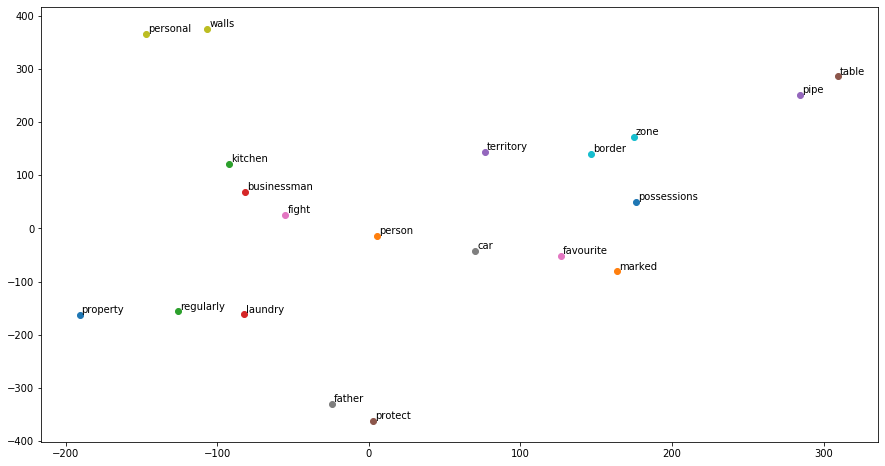

In [70]:
from sklearn.manifold import  TSNE
vocab = ['property','person','regularly','businessman','territory','protect','fight','car','walls','zone','possessions','marked','kitchen','laundry','pipe','table','favourite','father','personal','border']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)